<a href="https://colab.research.google.com/github/Starbish/FastAI-Course-1-Assignment/blob/main/lec2_deploy_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#| default_exp core
#| export
# nbdev를 사용해서 jupyter notebook 에서 직접 파이썬 코드를 추출하는 건 추후에 하는 것으로 함
# 오류가 해결이 안 됨...

from fastai.vision.all import *
import gradio as gr

def what_is_this(x):
    return x.parents.name

def label_func(x):
    keys = list(search_terms.keys())
    return keys.index(x)


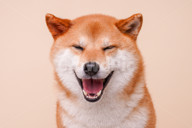

In [113]:
image = PILImage.create('shiba.jpg')
image.thumbnail((192, 192))
image

In [114]:
#| export
model = load_learner('model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [115]:
%time model.predict(image)

CPU times: user 282 ms, sys: 10.6 ms, total: 293 ms
Wall time: 305 ms


('shiba', tensor(1), tensor([0.0324, 0.9676]))

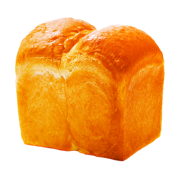

In [116]:
bread = PILImage.create('bread.jpg')
bread.thumbnail((192, 192))
bread

In [117]:
%time model.predict(bread)

CPU times: user 274 ms, sys: 1.11 ms, total: 275 ms
Wall time: 338 ms


('bread', tensor(0), tensor([9.9917e-01, 8.3349e-04]))

In [118]:
#| export
categories = ('Bread', 'Shiba')

def classify_image(image):
    pred, _, probs = model.predict(image)
    return dict(zip(categories, map(float, probs)))

In [119]:
classify_image(bread)

{'Bread': 0.9991664886474609, 'Shiba': 0.0008334879530593753}

In [120]:
classify_image(image)

{'Bread': 0.03239291533827782, 'Shiba': 0.9676071405410767}

In [121]:
#| export
# Gradio Interface
image = gr.Image()
label = gr.Label()
examples = ['bread.jpg', 'shiba.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ce1d6e1d21afc6ee3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#**Export**

In [3]:
!pip install nbdev
from nbdev.export import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.7.29
    Uninstalling fastcore-1.7.29:
      Successfully uninstalled fastcore-1.7.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires fastcore<1.8,>=1.5.29, but you have fastcore 1.8.4 which is incompatible.


In [4]:
%%writefile settings.ini
[DEFAULT]
lib_name = .
user = localuser
repo = localrepo
git_url = https://localhost
author = Local


Writing settings.ini


In [5]:
!nbdev_export

In [128]:
!nbdev_export --dbg

usage: nbdev_export [-h] [--path PATH] [--symlinks] [--file_glob FILE_GLOB] [--file_re FILE_RE] [--folder_re FOLDER_RE]
                    [--skip_file_glob SKIP_FILE_GLOB] [--skip_file_re SKIP_FILE_RE] [--skip_folder_re SKIP_FOLDER_RE]
                    [--procs [{black_format,scrub_magics} ...]]
nbdev_export: error: unrecognized arguments: --dbg
